<p> <center><font size="19" face="Segoe Script" color="salmon"> Assignment -2- </font> </center> </p>
  <center>  <center><font size="19" face="Segoe Script" color="salmon"> Student ID - 8944245  </font> </center>

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [152]:
heart_df = pd.read_csv("C://Users//krath//OneDrive//Documents//Cluster2023//Artificial Intelligence Algorith//Assign2//heart.csv")
heart_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [153]:
# Number of rows and columns
heart_df.shape

(918, 12)

In [154]:
# getting some info about the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [155]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [156]:
# checking the distribution of Target Variable
heart_df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

1 ===> Defective Heart

0 ===> Healthy Heart

In [157]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [158]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [159]:
# Checking for duplicates 
heart_df.duplicated().sum()

0


<font size="8" face="Segoe Script" color="#007C80"> _**2. Removing Outliers in the data using Z-score**_</font> 


In [160]:
from scipy import stats
z_scores = stats.zscore(heart_df[num_columns])
threshold = 3
outlier_indices = (abs(z_scores) > threshold).any(axis=1)
df_filtered = heart_df[~outlier_indices]
df_filtered.shape


(899, 12)


<font size="7" face="Segoe Script" color="salmon"> _**3.Convert text columns to numbers using label encoding and one hot encoding**_</font> 

In [161]:

columns_to_one_hot_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# Perform one-hot encoding for the specified columns
encoded_df = pd.get_dummies(df_filtered, columns=columns_to_one_hot_encode)
# Convert the One-hot-encoded boolean columns to integers 1 or 0
encoded_df[encoded_df.columns[encoded_df.columns.str.contains('_')]]= encoded_df[encoded_df.columns[encoded_df.columns.str.contains('_')]].astype(int)
encoded_df.head(4)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0


<font color = 'salmon'>_**Exploratory Data Analysis**_ </salmon>


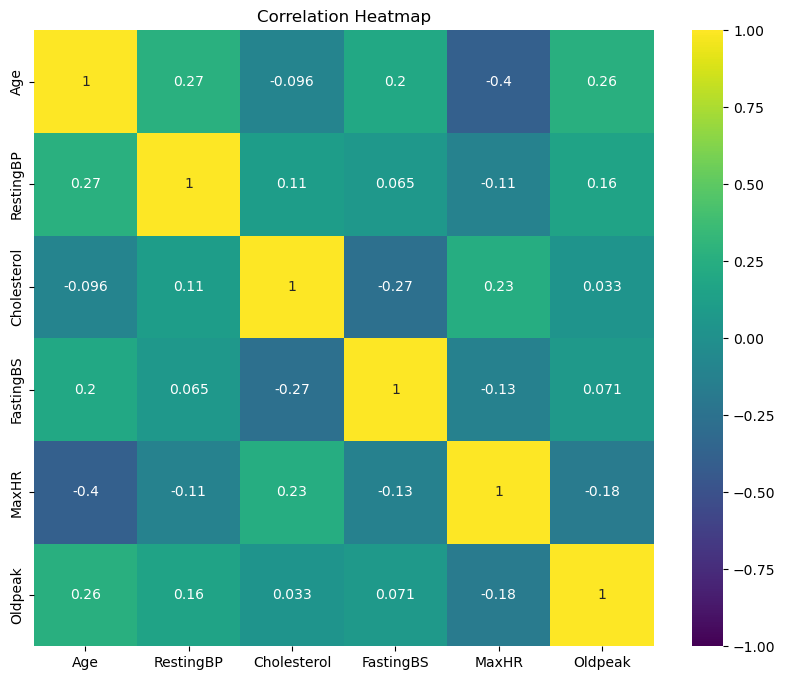

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = encoded_df.iloc[:,:6].corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

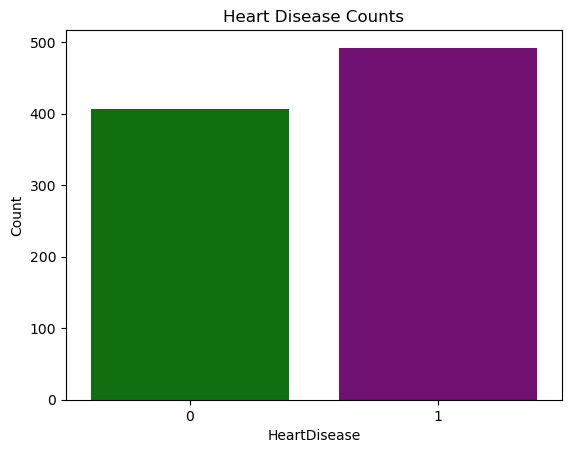

1    492
0    407
Name: HeartDisease, dtype: int64


In [163]:

# Count the occurrences of 0s and 1s in the "HeartDisease" column
heart_disease_counts = encoded_df["HeartDisease"].value_counts()
custom_palette = ["green", "purple"] 
# Create a count plot to visualize the counts
sns.countplot(data=encoded_df, x="HeartDisease", palette=custom_palette)
plt.title("Heart Disease Counts")
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.show()
# Print the counts
print(heart_disease_counts)


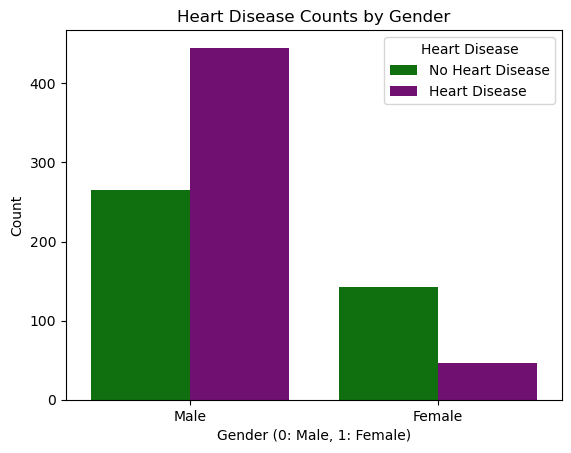

In [164]:

# Create a countplot to visualize the counts of individuals with and without heart disease based on gender
custom_palette = ["green", "purple"]  
sns.countplot(data=df_filtered, x="Sex", hue="HeartDisease", palette=custom_palette)
plt.title("Heart Disease Counts by Gender")
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Heart Disease", "Heart Disease"])
plt.xticks([0, 1], ["Male", "Female"])  
plt.show()




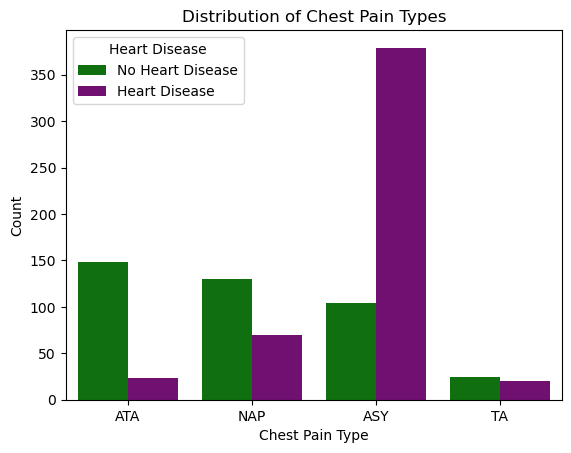

In [165]:

custom_palette = ["green", "purple"]  
sns.countplot(data=df_filtered, x="ChestPainType", hue="HeartDisease", palette=custom_palette)
plt.title("Distribution of Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Heart Disease", "Heart Disease"])
plt.show()



<font size="7" face="Segoe Script" color="salmon"> _**4.Apply scaling**_</font> 

In [166]:

# Define the target vector (dependent variable)
y = encoded_df['HeartDisease']
# Remove the target column from the features DataFrame
X = encoded_df.drop(columns=['HeartDisease'])
# Split the data into training and testing sets
X_trai, X_tes, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trai)
X_test = scaler.transform(X_tes)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)





X_train shape: (719, 20)
X_test shape: (180, 20)
y_train shape: (719,)
y_test shape: (180,)



<font size="7" face="Segoe Script" color="salmon"> _**5.Build a machine learning classification model using support vector machine**_</font>

In [167]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [168]:
# Predict using the standalone SVM model
svm_predict = svm_model.predict(X_test)
print(svm_predict)

[0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1
 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0]


In [169]:

# Calculate various performance metrics
svm_accuracy = accuracy_score(y_test, svm_predict)
svm_precision = precision_score(y_test, svm_predict)
svm_recall = recall_score(y_test, svm_predict)
svm_f1 = f1_score(y_test, svm_predict)
svm_confusion_matrix = confusion_matrix(y_test, svm_predict)

# Display the performance metrics in a concise format
svm_metrics = (
    f"Accuracy: {svm_accuracy:.2f}\n"
    f"Precision: {svm_precision:.2f}\n"
    f"Recall: {svm_recall:.2f}\n"
    f"F1 Score: {svm_f1:.2f}\n"
    f"Confusion Matrix:\n{svm_confusion_matrix}"
)

print("Standalone SVM Model Performance Metrics:")
print(svm_metrics)


Standalone SVM Model Performance Metrics:
Accuracy: 0.81
Precision: 0.77
Recall: 0.90
F1 Score: 0.83
Confusion Matrix:
[[59 25]
 [10 86]]


In [170]:

from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



# Build a standalone SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Define K-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Apply cross-validation and calculate metrics
cv_results = cross_validate(svm_model, X_train, y_train, cv=k_fold, scoring=scoring)

# Display the cross-validation results
for metric in scoring.keys():
    print(f"{metric} (K-Fold Cross-Validation): Mean={cv_results['test_' + metric].mean():.2f}, Std Dev={cv_results['test_' + metric].std():.2f}")




Accuracy (K-Fold Cross-Validation): Mean=0.88, Std Dev=0.02
Precision (K-Fold Cross-Validation): Mean=0.89, Std Dev=0.02
Recall (K-Fold Cross-Validation): Mean=0.90, Std Dev=0.03
F1 (K-Fold Cross-Validation): Mean=0.90, Std Dev=0.02


In [171]:

from sklearn.ensemble import BaggingClassifier
# Build a base SVM model
base_svm_model = SVC(kernel='linear', random_state=42)
# Build a Bagging model with SVM as the base estimator
bagging_svm_model = BaggingClassifier(base_estimator=base_svm_model, n_estimators=10, random_state=2)

# Train the Bagging model
bagging_svm_model.fit(X_train, y_train)
bagging_svm_predictions = bagging_svm_model.predict(X_test)

# Calculate accuracy and display classification report for the Bagging model
bagging_svm_accuracy = accuracy_score(y_test, bagging_svm_predictions)
bagging_svm_classification_report = classification_report(y_test, bagging_svm_predictions)
print("Bagging SVM Model Accuracy:", bagging_svm_accuracy)
print("Classification Report for Bagging SVM Model:\n", bagging_svm_classification_report)


Bagging SVM Model Accuracy: 0.8111111111111111
Classification Report for Bagging SVM Model:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78        84
           1       0.79      0.88      0.83        96

    accuracy                           0.81       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180



c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [172]:

# Define scoring metrics for cross-validation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Apply cross-validation and calculate metrics for Bagging SVM model
cv_results = cross_validate(bagging_svm_model, X_train, y_train, cv=5, scoring=scoring)

# Display the cross-validation results
for metric in scoring.keys():
    print(f"{metric} (Cross-Validation): Mean={cv_results['test_' + metric].mean():.2f}, Std Dev={cv_results['test_' + metric].std():.2f}")


c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy (Cross-Validation): Mean=0.87, Std Dev=0.02
Precision (Cross-Validation): Mean=0.88, Std Dev=0.04
Recall (Cross-Validation): Mean=0.89, Std Dev=0.02
F1 (Cross-Validation): Mean=0.88, Std Dev=0.02


c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(






<font size="7" face="Segoe Script" color="salmon"> _**6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance**_</font>

In [173]:


# Build a standalone Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict using the standalone Decision Tree model
dt_predictions = dt_model.predict(X_test)

# Calculate various performance metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

# Display the performance metrics
print(f"Standalone Decision Tree Model Performance Metrics:"
      f"\nAccuracy: {dt_accuracy:.2f}, Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, F1 Score: {dt_f1:.2f}"
      f"\n\nClassification Report:\n{dt_classification_report}"
      f"\n\nConfusion Matrix:\n{dt_confusion_matrix}")




Standalone Decision Tree Model Performance Metrics:
Accuracy: 0.75, Precision: 0.75, Recall: 0.79, F1 Score: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        84
           1       0.75      0.79      0.77        96

    accuracy                           0.75       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.75      0.75      0.75       180


Confusion Matrix:
[[59 25]
 [20 76]]


In [174]:

# Define scoring metrics for cross-validation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Apply cross-validation and calculate metrics for Decision Tree model
cv_results = cross_validate(dt_model, X_train, y_train, cv=5, scoring=scoring)

# Display the cross-validation results
for metric in scoring.keys():
    print(f"{metric} (Cross-Validation): Mean={cv_results['test_' + metric].mean():.2f}, Std Dev={cv_results['test_' + metric].std():.2f}")


Accuracy (Cross-Validation): Mean=0.82, Std Dev=0.03
Precision (Cross-Validation): Mean=0.86, Std Dev=0.04
Recall (Cross-Validation): Mean=0.82, Std Dev=0.04
F1 (Cross-Validation): Mean=0.84, Std Dev=0.03


In [175]:


# Build a base Decision Tree model
base_dt_model = DecisionTreeClassifier(random_state=42)

# Build a Bagging model with Decision Tree as the base estimator
bagging_dt_model = BaggingClassifier(base_estimator=base_dt_model, n_estimators=10, random_state=42)

# Train the Bagging model
bagging_dt_model.fit(X_train, y_train)

# Predict using the Bagging model
bagging_dt_predictions = bagging_dt_model.predict(X_test)

# Calculate accuracy and display classification report for the Bagging model
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
bagging_dt_classification_report = classification_report(y_test, bagging_dt_predictions)

print("Bagging Decision Tree Model Accuracy:", bagging_dt_accuracy)
print("Classification Report for Bagging Decision Tree Model:\n", bagging_dt_classification_report)


Bagging Decision Tree Model Accuracy: 0.7888888888888889
Classification Report for Bagging Decision Tree Model:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76        84
           1       0.77      0.86      0.81        96

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.79       180
weighted avg       0.79      0.79      0.79       180



c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [176]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Build a base Decision Tree model
base_dt_model = DecisionTreeClassifier(random_state=42)

# Build a Bagging model with Decision Tree as the base estimator
bagging_dt_model = BaggingClassifier(base_estimator=base_dt_model, n_estimators=10, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Apply cross-validation and calculate metrics for Bagging Decision Tree model
cv_results = cross_validate(bagging_dt_model, X_train, y_train, cv=5, scoring=scoring)

# Display the cross-validation results
for metric in scoring.keys():
    print(f"{metric} (Cross-Validation): Mean={cv_results['test_' + metric].mean():.2f}, Std Dev={cv_results['test_' + metric].std():.2f}")



c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy (Cross-Validation): Mean=0.85, Std Dev=0.02
Precision (Cross-Validation): Mean=0.87, Std Dev=0.04
Recall (Cross-Validation): Mean=0.85, Std Dev=0.02
F1 (Cross-Validation): Mean=0.86, Std Dev=0.02


c:\Users\krath\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



<u>**Analyzing the Choices:** </u><br>

1. **Decision Tree Bagging:** The Decision Tree model benefits significantly from bagging, resulting in a substantial accuracy improvement from 0.79 (standalone) to 0.86 (with bagging). This highlights the potential of bagging to alleviate the limitations of a standalone Decision Tree. <br>

2. **SVM Bagging:** On the other hand, both standalone SVM and SVM with bagging consistently achieve higher accuracy than the Decision Tree models. This suggests that SVM is intrinsically better at handling the dataset. <br>

<u>**Choosing the Best Model:** </u> <br>
While the Decision Tree model experiences a substantial improvement with bagging, it's important to consider the absolute accuracy values achieved by both SVM and Decision Tree models: <br>

- SVM with Bagging: 0.88 accuracy (cross-validation) <br>
- Decision Tree with Bagging: 0.85 accuracy (cross-validation) <br>

 <u>**Key Considerations:** </u> <br>

1. Higher Accuracy: The SVM model with bagging achieves a higher accuracy of 0.88 compared to the Decision Tree with bagging at 0.86. <br>

2. **Consistency:** The SVM model consistently outperforms the Decision Tree model across all scenarios, including standalone and bagging. <br>

 <u>**Decision-Making:** </u> <br>
Given that the SVM model not only has a higher accuracy in both standalone and bagging scenarios but also maintains consistency across different settings, it remains the more preferable choice for this specific classification task based on the accuracy metric. <br>

In summary, the SVM model's higher accuracy and consistency across scenarios make it the more suitable choice for this classification task, despite the substantial improvement seen in the Decision Tree model with bagging.




